In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df =pd.read_csv(r'C:\Users\SRK\Desktop\siva_python\classification\day1\US_Heart_Patients.csv')

In [3]:
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.isna().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.fillna(method ='ffill',inplace =True)


In [7]:
y = df.TenYearCHD
x = df.drop(columns ='TenYearCHD')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

accuracy score on train 1.0
AxesSubplot(0.125,0.125;0.62x0.755)


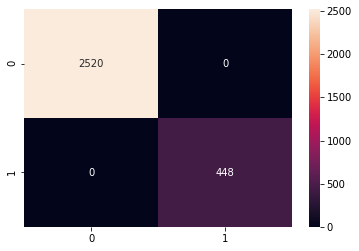

auc_roc_score train is  1.0
accuracy score on test 0.8490566037735849
AxesSubplot(0.125,0.125;0.62x0.755)
auc_roc_score_test is  0.680937523708368


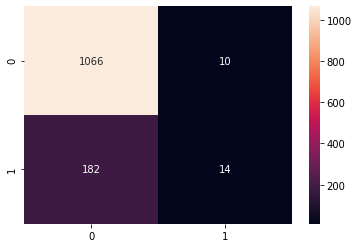

In [11]:
rfc = RandomForestClassifier()
model =rfc.fit(X_train,y_train)
ytrain_prob = model.predict_proba(X_train)[:,1]
ytrainpred = model.predict(X_train)
print('accuracy score on train',accuracy_score(y_train,ytrainpred))
print(sns.heatmap(confusion_matrix(y_train,ytrainpred),annot =True,fmt ='g'))
plt.show()
print('auc_roc_score train is ',roc_auc_score(y_train,ytrain_prob))
ytest_prob = model.predict_proba(X_test)[:,1]
ytestpred = model.predict(X_test)
print('accuracy score on test',accuracy_score(y_test,ytestpred))
print(sns.heatmap(confusion_matrix(y_test,ytestpred),annot =True,fmt ='g'))
print('auc_roc_score_test is ',roc_auc_score(y_test,ytest_prob))

n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

param_dist = { 'n_estimators': randint(5,1000),
              "criterion": ["gini", "entropy"],
              "max_depth": randint(2,10),
              "min_samples_split" :randint(2, 100),
              "min_samples_leaf": randint(1, 100),
              'max_features' : randint(1,15),
              }

# Hyper parameter tuning of Randomsearch tuning

In [14]:
%%time

rfctun = RandomForestClassifier(n_jobs =-1)
#modelt =rfctun.fit(X_train,y_train)

from scipy.stats import randint
param_dist = { 'n_estimators': randint(5,100),
              "criterion": ["gini", "entropy"],
              "max_depth": randint(2,10),
              "min_samples_split" :randint(2, 100),
              "min_samples_leaf": randint(1, 100),
              'max_features' : randint(1,15),
              }
rsearch = RandomizedSearchCV(rfctun, param_dist, random_state=0,cv =10,n_iter=100,scoring ='roc_auc',n_jobs =-1)
rsearch.fit(x, y)
rsearch.best_params_

Wall time: 3min 18s


{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 6,
 'min_samples_leaf': 30,
 'min_samples_split': 69,
 'n_estimators': 40}

In [15]:
rsearch.score(X_train,y_train)##X_train, X_test, y_train, y_test


0.7862873795351475

In [16]:
rsearch.score(X_test,y_test)

0.7876583718989455

In [17]:
pd.DataFrame(rsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.900185,0.137419,0.149415,0.028623,gini,9,6,65,69,72,...,0.708073,0.666710,0.724349,0.736576,0.739490,0.734648,0.694236,0.711133,0.022868,35
1,0.850611,0.057199,0.131426,0.019896,entropy,3,4,22,38,92,...,0.724696,0.668012,0.733333,0.730576,0.741761,0.735976,0.689565,0.709015,0.027153,50
2,0.644530,0.064320,0.137722,0.023051,gini,2,9,13,60,70,...,0.711393,0.665994,0.714236,0.712663,0.710714,0.739533,0.690079,0.701249,0.020235,86
3,1.185520,0.162851,0.275043,0.157386,gini,9,8,47,90,86,...,0.713064,0.668056,0.728168,0.747847,0.727834,0.736362,0.704693,0.713262,0.023708,13
4,0.411464,0.162723,0.143618,0.048770,entropy,3,14,73,11,25,...,0.693533,0.662044,0.727083,0.731798,0.735933,0.730855,0.694879,0.707020,0.023676,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.898085,0.114484,0.151114,0.021648,entropy,3,8,95,74,89,...,0.710851,0.663802,0.730686,0.730962,0.728562,0.743604,0.699764,0.709209,0.024485,46
96,0.997128,0.080247,0.135420,0.022917,entropy,5,6,92,69,89,...,0.702170,0.668490,0.733941,0.735333,0.734390,0.745747,0.701436,0.711843,0.025240,31
97,0.313221,0.096719,0.124636,0.027219,entropy,5,1,6,93,35,...,0.717687,0.648351,0.718707,0.739533,0.759931,0.721320,0.693122,0.705616,0.031489,73
98,0.159674,0.048717,0.120321,0.015161,entropy,5,8,22,94,13,...,0.682726,0.678190,0.734766,0.744354,0.738440,0.729269,0.677887,0.709344,0.025040,44


accuracy score on train 0.8493935309973046
AxesSubplot(0.125,0.125;0.62x0.755)
auc_roc_score is  0.7962062429138321


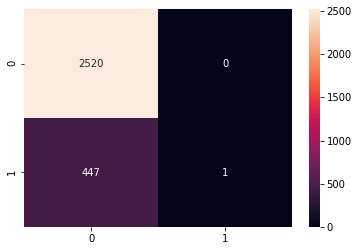

In [18]:

dtr = RandomForestClassifier(**rsearch.best_params_)
dtr.fit(X_train,y_train)
ytrain_prob = dtr.predict_proba(X_train)[:,1]
ytrainpred = dtr.predict(X_train)
print('accuracy score on train',accuracy_score(y_train,ytrainpred))
print(sns.heatmap(confusion_matrix(y_train,ytrainpred),annot =True,fmt ='g'))
print('auc_roc_score is ',roc_auc_score(y_train,ytrain_prob))




accuracy score on train 0.8459119496855346
AxesSubplot(0.125,0.125;0.62x0.755)
auc_roc_score is  0.704887717168652


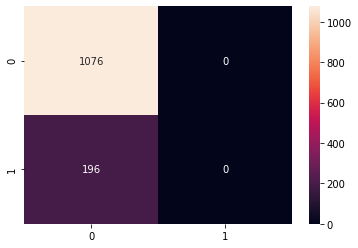

In [19]:
ytest_prob = dtr.predict_proba(X_test)[:,1]
ytestpred = dtr.predict(X_test)
print('accuracy score on train',accuracy_score(y_test,ytestpred))
print(sns.heatmap(confusion_matrix(y_test,ytestpred),annot =True,fmt ='g'))
print('auc_roc_score is ',roc_auc_score(y_test,ytest_prob))

In [20]:
dtr.feature_importances_

array([0.04283781, 0.26149558, 0.01036182, 0.00869946, 0.0652976 ,
       0.        , 0.        , 0.05290453, 0.00583473, 0.0576094 ,
       0.208943  , 0.10383557, 0.07465227, 0.03253708, 0.07499114])

In [21]:
imp =pd.DataFrame(dtr.feature_importances_,index = x.columns,columns = ['importance'])

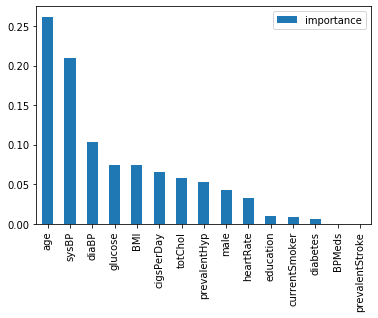

In [22]:
imp.sort_values(by = 'importance',ascending=False).plot(kind ='bar')

## KNN--K nearest neighbor

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [25]:
xs = ss.fit_transform(x)

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
params = {
    'n_neighbors': randint(2,50),
    'p': randint(1,5),
}

knnsearch   = RandomizedSearchCV(knc,params,cv =3,scoring = 'roc_auc',n_jobs =-1,n_iter =100)
knnsearch.fit(xs,y)
knnsearch.best_params_

{'n_neighbors': 49, 'p': 1}

In [27]:
knnsearch.score(X_train,y_train)##X_train, X_test, y_train, y_test


0.590430573270975

In [28]:
knnsearch.score(X_test,y_test)

0.5668504855473787

In [29]:
pd.DataFrame(knnsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036975,0.001633,4.150293,0.018542,21,4,"{'n_neighbors': 21, 'p': 4}",0.642613,0.652230,0.679875,0.658239,0.015795,71
1,0.038643,0.002867,0.394775,0.016382,41,1,"{'n_neighbors': 41, 'p': 1}",0.650695,0.686429,0.696057,0.677727,0.019514,7
2,0.038643,0.002493,4.342849,0.367342,11,4,"{'n_neighbors': 11, 'p': 4}",0.620895,0.653305,0.664126,0.646109,0.018368,83
3,0.040642,0.002866,4.323527,0.122917,4,3,"{'n_neighbors': 4, 'p': 3}",0.580348,0.612898,0.622858,0.605368,0.018153,96
4,0.050637,0.002624,0.382781,0.022980,16,2,"{'n_neighbors': 16, 'p': 2}",0.637396,0.664274,0.690040,0.663903,0.021493,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.034980,0.000816,4.123306,0.025890,24,4,"{'n_neighbors': 24, 'p': 4}",0.643183,0.654412,0.683012,0.660203,0.016768,68
96,0.038642,0.004189,0.397440,0.003089,44,2,"{'n_neighbors': 44, 'p': 2}",0.649561,0.677644,0.698488,0.675231,0.020047,16
97,0.041307,0.002356,4.412144,0.047135,35,3,"{'n_neighbors': 35, 'p': 3}",0.640650,0.669717,0.692790,0.667719,0.021333,43
98,0.036976,0.000817,0.359128,0.015318,24,1,"{'n_neighbors': 24, 'p': 1}",0.647668,0.685339,0.689409,0.674139,0.018791,20


In [30]:
xsTrain = ss.fit_transform(X_train)
xstest =ss.transform(X_test)

accuracy score on train 0.8490566037735849
AxesSubplot(0.125,0.125;0.62x0.755)
auc_roc_score is  0.7340370783730157


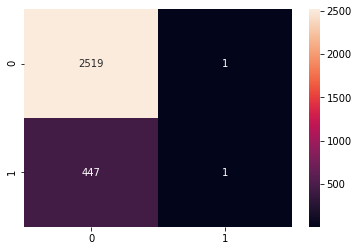

In [31]:

dtr = KNeighborsClassifier(**knnsearch.best_params_)
dtr.fit(xsTrain,y_train)
ytrain_prob = dtr.predict_proba(xsTrain)[:,1]
ytrainpred = dtr.predict(xsTrain)
print('accuracy score on train',accuracy_score(y_train,ytrainpred))
print(sns.heatmap(confusion_matrix(y_train,ytrainpred),annot =True,fmt ='g'))
print('auc_roc_score is ',roc_auc_score(y_train,ytrain_prob))




accuracy score on train 0.8459119496855346
AxesSubplot(0.125,0.125;0.62x0.755)
auc_roc_score is  0.6855962180411198


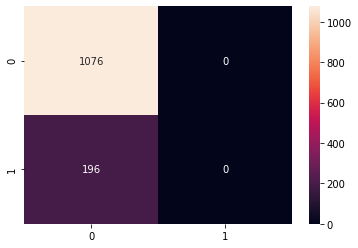

In [32]:
ytest_prob = dtr.predict_proba(xstest)[:,1]
ytestpred = dtr.predict(xstest)
print('accuracy score on train',accuracy_score(y_test,ytestpred))
print(sns.heatmap(confusion_matrix(y_test,ytestpred),annot =True,fmt ='g'))
print('auc_roc_score is ',roc_auc_score(y_test,ytest_prob))

# stacking  algorith to improve results.

In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(**rsearch.best_params_)
knn = KNeighborsClassifier(**knnsearch.best_params_)

In [35]:
clf =VotingClassifier(estimators=[('le',lr),('rfc',rfc),('knn',knn)],voting='soft')
clf.fit(X_train,y_train)

VotingClassifier(estimators=[('le',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=No...
                                        

In [36]:
def evaluation_train_test(model,X_train,y_train,X_test,y_test):
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_train_pred = model.predict(X_train)
    y_test_prob = model.predict_proba(X_test)[:,1]
    y_test_pred = model.predict(X_test)
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report
    print('Train accuracy score of',model,':',accuracy_score(y_train,y_train_pred))
    print('Test accuracy score of ',model,':',accuracy_score(y_test,y_test_pred))
    
    print('rou_auc_score',roc_auc_score(y_train,y_train_prob))
    print('rou_auc_score',roc_auc_score(y_test,y_test_prob))
    print('Train classification report \n',classification_report(y_train,y_train_pred))
    print('Test classification report \n',classification_report(y_test,y_test_pred))

    
    fig,axes =plt.subplots(1,2,figsize =(15,5))
    sns.heatmap(confusion_matrix(y_train,y_train_pred),annot =True,fmt ='g',ax =axes[0])
    #plt.show()
    sns.heatmap(confusion_matrix(y_test,y_test_pred),annot =True,fmt ='g',ax =axes[1])
    plt.show()
    
    def roc_curves(y_true,y_true_prob):
          
          fpr, tpr, thresholds  =roc_curve(y_true,y_true_prob)
          thresholds[0] = thresholds[0]-1
          plt.plot(fpr,tpr)
          plt.plot(fpr,fpr)
          plt.plot(fpr,thresholds)
          plt.show();
    print('roc curve for Train')
    roc_curves(y_train,y_train_prob)
    print('roc curve for Test')
    roc_curves(y_test,y_test_prob)


Train accuracy score of VotingClassifier(estimators=[('le',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=No...
                

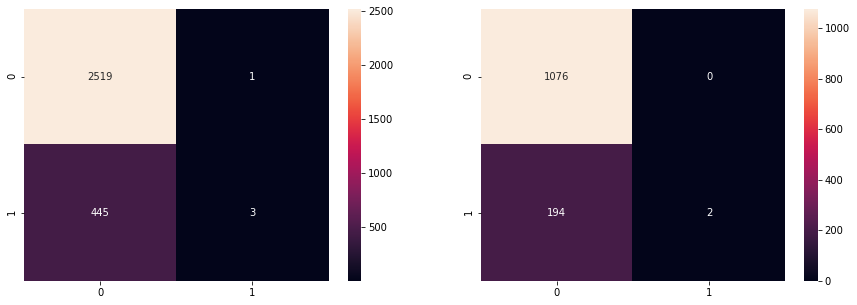

roc curve for Train


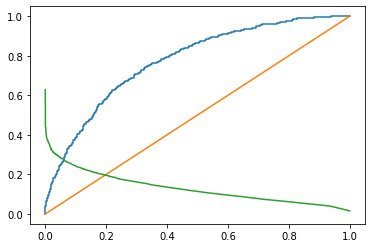

roc curve for Test


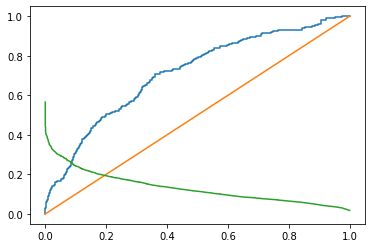

In [37]:
evaluation_train_test(clf,X_train,y_train,X_test,y_test)

In [ ]:
# weighted stacking model

Train accuracy score of VotingClassifier(estimators=[('le',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=No...
                

C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


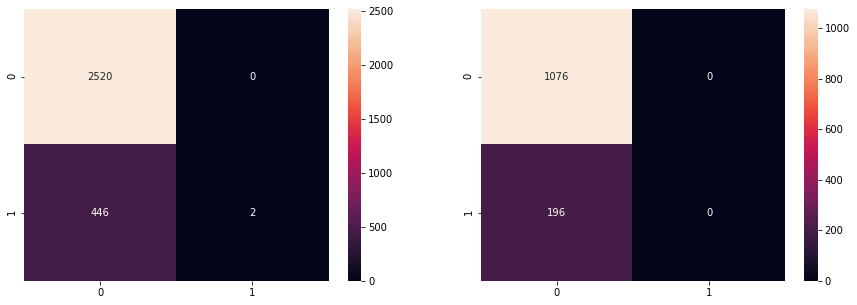

roc curve for Train


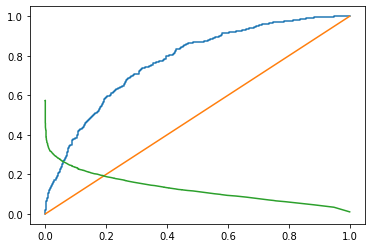

roc curve for Test


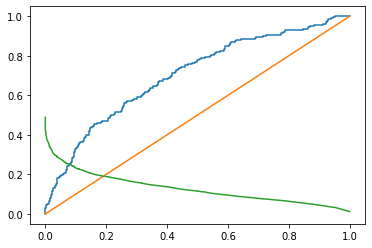

In [38]:
clf =VotingClassifier(estimators=[('le',lr),('rfc',rfc),('knn',knn)],voting='soft',weights=[1,2,3])
clf.fit(X_train,y_train)
evaluation_train_test(clf,X_train,y_train,X_test,y_test)